# File and libraries

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


filepath=r'data/df_merch_encoded.csv'


file_tag = "df_merch_encoded"

# DSLabs functions

In [26]:
%run "scripts/dslabs_functions.py"


# Data functions

In [27]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [28]:
# test_data=True
test_data=False

if test_data==True:

    data=pd.read_csv(filepath)

    # 10% sample
    data=data.sample(frac=0.1, replace=False)
    

else:
    data=pd.read_csv(filepath)

 


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371714 entries, 0 to 371713
Data columns (total 35 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   event_name                       371714 non-null  int64  
 1   device_category                  371714 non-null  int64  
 2   device_mobile_brand_name         371714 non-null  int64  
 3   device_mobile_model_name         371713 non-null  float64
 4   device_operating_system          371714 non-null  int64  
 5   device_operating_system_version  258461 non-null  float64
 6   device_language                  199075 non-null  float64
 7   device_web_info_browser          371714 non-null  int64  
 8   device_web_info_browser_version  362472 non-null  float64
 9   geo_country                      371714 non-null  int64  
 10  geo_region                       367410 non-null  float64
 11  geo_city                         351537 non-null  float64
 12  tr

# MV 1 - Most Frequent

In [29]:
from numpy import ndarray
from pandas import concat
from sklearn.impute import SimpleImputer, KNNImputer
from dslabs_functions import get_variable_types, mvi_by_filling


def mvi_by_filling(data: DataFrame, strategy: str = "frequent") -> DataFrame:
    df: DataFrame
    variables: dict = get_variable_types(data)
    stg_num, v_num = "mean", -1
    stg_sym, v_sym = "most_frequent", "NA"
    stg_bool, v_bool = "most_frequent", False
    if strategy != "knn":
        lst_dfs: list = []
        if strategy == "constant":
            stg_num, stg_sym, stg_bool = "constant", "constant", "constant"
        if len(variables["numeric"]) > 0:
            imp = SimpleImputer(strategy=stg_num, fill_value=v_num, copy=True)
            tmp_nr = DataFrame(
                imp.fit_transform(data[variables["numeric"]]),
                columns=variables["numeric"],
            )
            lst_dfs.append(tmp_nr)
        if len(variables["symbolic"]) > 0:
            imp = SimpleImputer(strategy=stg_sym, fill_value=v_sym, copy=True)
            tmp_sb = DataFrame(
                imp.fit_transform(data[variables["symbolic"]]),
                columns=variables["symbolic"],
            )
            lst_dfs.append(tmp_sb)
        if len(variables["binary"]) > 0:
            imp = SimpleImputer(strategy=stg_bool, fill_value=v_bool, copy=True)
            tmp_bool = DataFrame(
                imp.fit_transform(data[variables["binary"]]),
                columns=variables["binary"],
            )
            lst_dfs.append(tmp_bool)
        df = concat(lst_dfs, axis=1)
    else:
        imp = KNNImputer(n_neighbors=5)
        imp.fit(data)
        ar: ndarray = imp.transform(data)
        df = DataFrame(ar, columns=data.columns, index=data.index)
    return df


data_1 =  mvi_by_filling(data, strategy="frequent")

data_1.describe()


,event_name,device_category,device_mobile_brand_name,device_mobile_model_name,device_operating_system,device_operating_system_version,device_language,device_web_info_browser,device_web_info_browser_version,geo_region,...,page_path_level_2,page_path_level_3,path_length,geo_country,session_engaged,returning_user,year,quarter,is_weekend,domain
count,371714.000000,371714.000000,371714.000000,371714.000000,371714.000000,371714.000000,371714.000000,371714.000000,371714.000000,371714.000000,...,371714.000000,371714.000000,371714.000000,371714.000000,371714.000000,371714.000000,371714.000000,371714.000000,371714.000000,371714.000000
mean,6.810333,1.812735,4.768653,10.420179,3.715445,4.566043,6.786482,2.191389,4.352573,2990.812379,...,22.926075,264.547014,1.996530,1.145711,0.915217,0.258963,1.261965,1.261965,0.198198,1.966022
std,1.854883,0.971340,1.345632,3.011988,1.586145,2.421290,1.552400,0.639513,1.779542,1761.545179,...,12.916481,119.734153,1.140094,0.352817,0.278559,0.438066,0.439704,0.439704,0.398643,0.181172
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,6.000000,1.000000,4.000000,8.000000,2.000000,2.000000,6.786482,2.000000,3.000000,1580.000000,...,5.000000,130.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
50%,8.000000,1.000000,5.000000,10.000000,4.000000,4.566043,6.786482,2.000000,4.000000,3621.000000,...,28.000000,342.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000
75%,8.000000,3.000000,5.000000,12.000000,5.000000,5.000000,8.000000,3.000000,4.352573,4382.000000,...,34.000000,362.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,2.000000
max,13.000000,3.000000,9.000000,19.000000,6.000000,10.000000,8.000000,4.000000,11.000000,6491.000000,...,51.000000,379.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000


## MV 1 train test split

In [30]:
# train_data_1, test_data_1 = train_test_split(data_1, test_size=0.3, random_state=42)


## MV1 evaluation

In [31]:
from numpy import array, ndarray

target = "returning_user"
labels: list = list(data_1[target].unique())
labels.sort()
print(f"Labels={labels}")

positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {
    "Original": [
        len(data_1[data_1[target] == negative]),
        len(data_1[data_1[target] == positive]),
    ]
}

y: array = data_1.pop(target).to_list()
X: ndarray = data_1.values

Labels=[0.0, 1.0]


<Axes: title={'center': 'Data distribution per dataset'}>

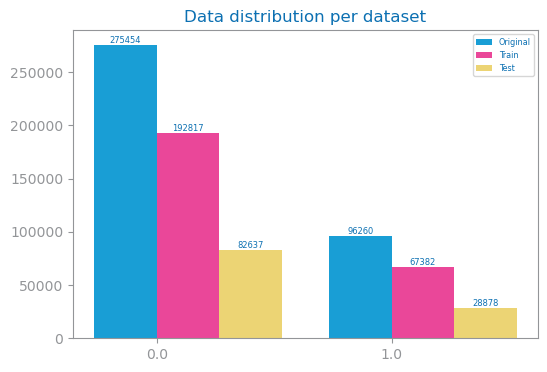

In [32]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart


trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train: DataFrame = concat(
    [DataFrame(trnX, columns=data_1.columns), DataFrame(trnY, columns=[target])], axis=1
)
# train.to_csv(f"data/{file_tag}_train.csv", index=False)

test: DataFrame = concat(
    [DataFrame(tstX, columns=data_1.columns), DataFrame(tstY, columns=[target])], axis=1
)
# test.to_csv(f"data/{file_tag}_test.csv", index=False)

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

### naive bayes

In [33]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(trnX, trnY)
pred_trnY: array = clf.predict(trnX)
print(f"Score over Train: {clf.score(trnX, trnY):.3f}")
print(f"Score over Test: {clf.score(tstX, tstY):.3f}")

Score over Train: 0.735
Score over Test: 0.734


# MV 2 - KNN strategy

In [ ]:
# numeric_vars: list[str] = get_variable_types(data)["numeric"]

data_2 = mvi_by_filling(data, strategy="knn")

data_2.describe()

## MV2 train test split

In [21]:
# train_data_2, test_data_2 = train_test_split(data_2, test_size=0.3, random_state=42)


# from numpy import array, ndarray

target = "returning_user"
labels: list = list(data_2[target].unique())
labels.sort()
print(f"Labels={labels}")

positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {
    "Original": [
        len(data_2[data_2[target] == negative]),
        len(data_2[data_2[target] == positive]),
    ]
}

y: array = data_2.pop(target).to_list()
X: ndarray = data_2.values

Labels=[0.0, 1.0]


<Axes: title={'center': 'Data distribution per dataset'}>

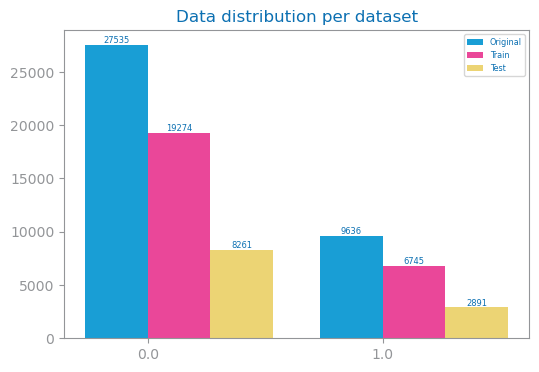

In [22]:
trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train: DataFrame = concat(
    [DataFrame(trnX, columns=data_2.columns), DataFrame(trnY, columns=[target])], axis=1
)
# train.to_csv(f"data/{file_tag}_train.csv", index=False)

test: DataFrame = concat(
    [DataFrame(tstX, columns=data_2.columns), DataFrame(tstY, columns=[target])], axis=1
)
# test.to_csv(f"data/{file_tag}_test.csv", index=False)

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

# test inputs

### naive bayes

In [23]:
# from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(trnX, trnY)
pred_trnY: array = clf.predict(trnX)
print(f"Score over Train: {clf.score(trnX, trnY):.3f}")
print(f"Score over Test: {clf.score(tstX, tstY):.3f}")

Score over Train: 0.731
Score over Test: 0.727


# save to csv

In [24]:
# # choose final version
# data_final=data_1

# # Saving to CSV files
# data_final.to_csv('data/df_merch_mv_input.csv',index=False)
